## Random Forest Model for Costa Rican Poverty Level Predicion

### Outline
**1. Project Setup** \
*1.1 Load Data and Packages* \
*1.2 Data Prep* \
\
**2. What is a Naive Bayes Model?** \
*2.1 Summary of Approach* \
*2.2 Summary of Findings* \
\
**3. Models** \
*3.1 Basic Models* \
*3.2 Improving Model Performance* \
\
**4. Limitation and Next Steps**

## 1. Project Setup

### 1.1 Load Data & Packages

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import load_data
from evaluate_classification import evaluate_classification


### 1.2 Prep the data

In [31]:
df, X_valid, y_valid = load_data.load_train_data()
X = df.iloc[:, :-1]
y = df.loc[:, 'Target']

### 2. What is a Random Forest Model?

A Random Forest model is....a series of decision trees, averaged

#### 2.1 Summary of Approach


### 2.2 Summary of Findings

*We explored the following models. Accuracy refers to performance on training data.*

## 3. Models

### 3.1 Basic Models

In [32]:

# test of defaults
clf = RandomForestClassifier()
clf.fit(X, y)

y_pred = clf.predict(X_valid)
evaluate_classification(y_pred, y_valid)

Accuracy: 0.6554621848739496
F1 Score: 0.5826262541698178
Recall: 0.6554621848739496


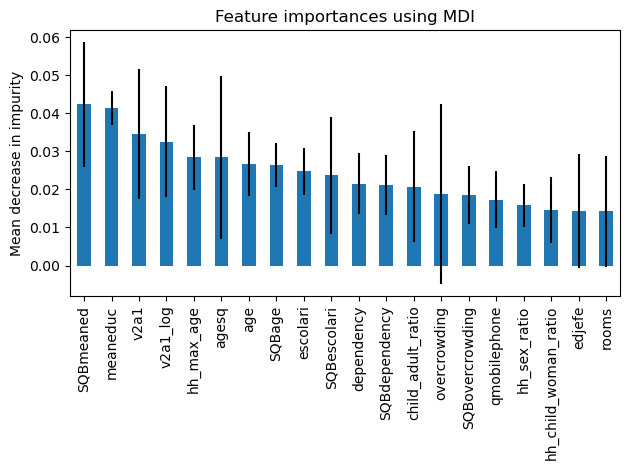

In [50]:
# Make graph of feature importance
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
feature_names = X.columns.values.tolist()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

# top 20 features
top_20 = forest_importances.nlargest(20)
indices = np.where(np.in1d(forest_importances, top_20))[0]

fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
top_20.plot.bar(yerr=std[indices], ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

array([0.01631159, 0.00455889, 0.01699963, 0.01459338, 0.00864973,
       0.02153511, 0.00832371, 0.00583832, 0.00630392, 0.01543021,
       0.00800288, 0.00795223, 0.01457489, 0.02367133, 0.00761988,
       0.00745511, 0.00553821, 0.00869453, 0.01490629, 0.01454656])

In [35]:
# Iterate over: 
    # number of trees: n_estimators
    #max_depth



## 4. Limitations and Next Steps